In [1]:
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import RepeatVector
# from tensorflow.keras.layers import TimeDistributed
# from tensorflow.keras.utils import plot_model
# import tensorflow as tf
from sklearn.preprocessing import StandardScaler as SS

In [2]:
df = pd.read_csv('Gearbox Dataset/Run_1.csv', header=None)
df.head()

,0,1,2
0,0.012054,0.003204,4.9133
1,0.010071,0.005188,4.9097
2,0.014954,0.004883,4.9158
3,0.014496,0.005798,4.9158
4,0.018005,0.003815,4.9243


In [3]:
# define input sequence
sequence = df[[0]][0:10000]
print(sequence.shape)

(10000, 1)


In [4]:
train_length = int(len(sequence)*0.90)
train, test = sequence[0:train_length], sequence[train_length:]

In [5]:
print(train.shape, test.shape)

(9000, 1) (1000, 1)


In [6]:
scaler = SS()
scaler = scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [7]:
seq_size = 100

In [8]:
def to_sequence(x,y,seq_size=1):
    x_vs = []
    y_vs = []
    for i in range(len(x)-seq_size):
        x_vs.append(x[i:i+seq_size])
        y_vs.append(y[i+seq_size])
    
    return np.array(x_vs), np.array(y_vs)

In [9]:
trainX, trainY = to_sequence(train, train, seq_size)

In [10]:
testX, testY = to_sequence(test, test, seq_size)

In [11]:
trainX.shape

(8900, 100, 1)

## ---------------------------------------------------------------------------------------------------------------------

In [168]:
input_layer = tf.keras.layers.Input(shape=(trainX.shape[1], trainX.shape[2]))
encode_1    = tf.keras.layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu")(input_layer)
dropout_1   = tf.keras.layers.Dropout(rate=0.2)(encode_1)
encode_2    = tf.keras.layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu")(dropout_1)

decode_1    = tf.keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu")(encode_2)
dropout_2   = tf.keras.layers.Dropout(rate=0.2)(decode_1)
decode_2    = tf.keras.layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu")(dropout_2)
reconstruct = tf.keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same")(decode_2)
coded = tf.keras.layers.Conv1D(filters=1, kernel_size=7, padding="same", name='Code')(encode_2)
model_f = tf.keras.Model(inputs=input_layer, outputs=reconstruct)

In [169]:
model_f.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
plot_model(model_f, to_file='model.png', show_shapes=True, show_dtype=True)
model_f.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 1)]          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 50, 32)            256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 25, 16)            3600      
_________________________________________________________________
conv1d_transpose_23 (Conv1DT (None, 50, 16)            1808      
_________________________________________________________________
dropout_29 (Dropout)         (None, 50, 16)            0         
_________________________________________________________________
conv1d_transpose_24 (Conv1DT (None, 100, 32)           3616

In [170]:
encoder = tf.keras.Model(inputs=input_layer, outputs=coded)
encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 1)]          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 50, 32)            256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 25, 16)            3600      
_________________________________________________________________
Code (Conv1D)                (None, 25, 1)             113       
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [171]:
model_f.fit(trainX, trainX, batch_size=32, validation_split = 0.1, epochs=10, verbose=1, shuffle=False)

Epoch 1/10
251/251 [==============================] - 16s 36ms/step - loss: 0.2627 - val_loss: 0.0443
Epoch 2/10
251/251 [==============================] - 5s 21ms/step - loss: 0.1076 - val_loss: 0.0276
Epoch 3/10
251/251 [==============================] - 5s 21ms/step - loss: 0.0882 - val_loss: 0.0219
Epoch 4/10
251/251 [==============================] - 5s 20ms/step - loss: 0.0738 - val_loss: 0.0245
Epoch 5/10
251/251 [==============================] - 5s 19ms/step - loss: 0.0627 - val_loss: 0.0316
Epoch 6/10
251/251 [==============================] - 5s 20ms/step - loss: 0.0553 - val_loss: 0.0371
Epoch 7/10
251/251 [==============================] - 5s 20ms/step - loss: 0.0506 - val_loss: 0.0325
Epoch 8/10
251/251 [==============================] - 5s 19ms/step - loss: 0.0472 - val_loss: 0.0356
Epoch 9/10
251/251 [==============================] - 5s 21ms/step - loss: 0.0442 - val_loss: 0.0347
Epoch 10/10
251/251 [==============================] - 5s 21ms/step - loss: 0.0423 - val_l

In [175]:
enc = encoder.predict(yy)

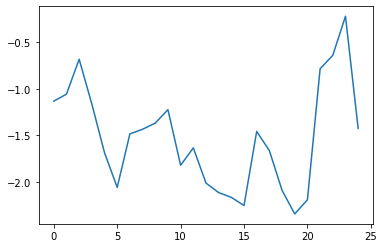

In [178]:
plt.plot(enc[0])

In [179]:
yyy = model_f.predict(yy, verbose=1)

1/1 [==============================] - 2s 2s/step


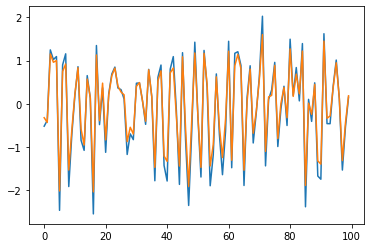

In [181]:
plt.plot(yy[0])
plt.plot(yyy[0])